<a href="https://colab.research.google.com/github/sirtugrul/Aygaz-Yapay-Zekaya-Giri-Bootcamp/blob/main/Gorev13_Tugrul_Evlek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR 10 veri seti ile CNN modeli geliştirip yorumlayın.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10

In [ ]:
cifar = cifar10.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar

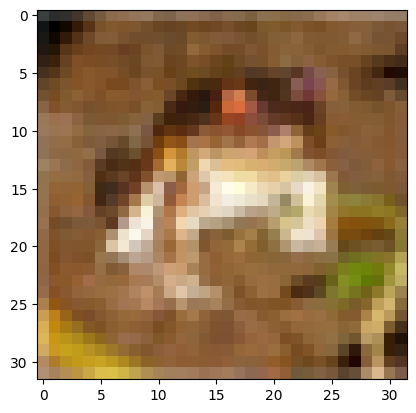

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train / 255
X_test = X_test /255

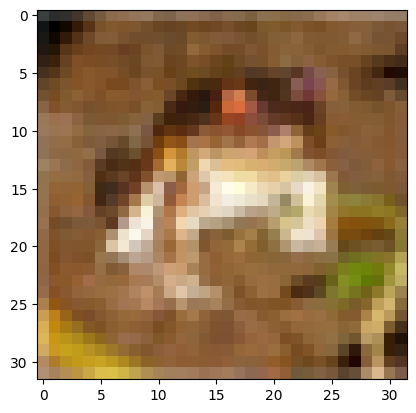

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_test = to_categorical(y_test, 10)

y_train = to_categorical(y_train, 10)

In [ ]:
X_train = X_train.reshape(50000, 32, 32, 3)
X_test = X_test.reshape(10000, 32, 32, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,314 (3.14 MB)

 Trainable params: 822,314 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4065 - loss: 1.6247 - val_accuracy: 0.5715 - val_loss: 1.2307
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5954 - loss: 1.1434 - val_accuracy: 0.5972 - val_loss: 1.1254
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6621 - loss: 0.9603 - val_accuracy: 0.6274 - val_loss: 1.0631
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7066 - loss: 0.8250 - val_accuracy: 0.6463 - val_loss: 1.0513
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7463 - loss: 0.7184 - val_accuracy: 0.6245 - val_loss: 1.1467
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7814 - loss: 0.6160 - val_accuracy: 0.6215 - val_loss: 1.1902


In [ ]:
losses1 = pd.DataFrame(model.history.history)

<Axes: >

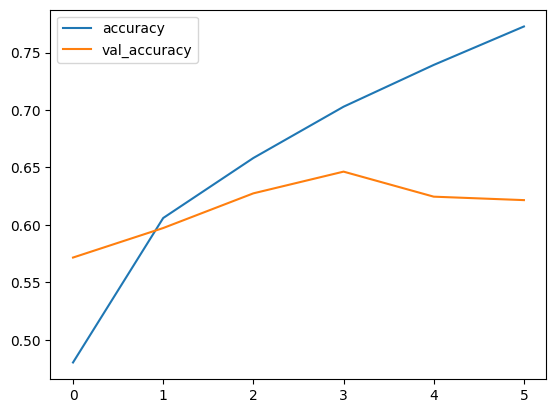

In [ ]:
losses1[["accuracy", "val_accuracy"]].plot()

<Axes: >

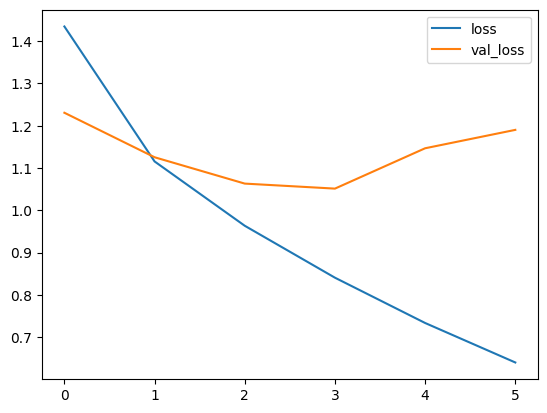

In [ ]:
losses1[["loss", "val_loss"]].plot()

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = "relu"))
model_2.add(MaxPool2D(pool_size = (2, 2)))
model_2.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = "relu"))
model_2.add(MaxPool2D(pool_size = (2, 2)))
model_2.add(Conv2D(filters = 16, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = "relu"))
model_2.add(MaxPool2D(pool_size = (2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation = "relu"))
model_2.add(Dense(128, activation = "relu"))
model_2.add(Dense(10, activation = "softmax"))
model_2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", patience = 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 2, 2, 16)            │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,170 (180.35 KB)

 Trainable params: 46,170 (180.35 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2896 - loss: 1.8750 - val_accuracy: 0.4967 - val_loss: 1.3941
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5033 - loss: 1.3544 - val_accuracy: 0.5402 - val_loss: 1.2708
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5503 - loss: 1.2405 - val_accuracy: 0.5655 - val_loss: 1.2108
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5862 - loss: 1.1583 - val_accuracy: 0.5958 - val_loss: 1.1391
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6086 - loss: 1.0898 - val_accuracy: 0.5987 - val_loss: 1.1424
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6293 - loss: 1.0471 - val_accuracy: 0.6148 - val_loss: 1.0921
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6414 - loss: 1.0062 - val_accuracy: 0.6290 - val_loss: 1.0530
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6549 - loss: 0.9776 

In [ ]:
losses2 = pd.DataFrame(model_2.history.history)

<Axes: >

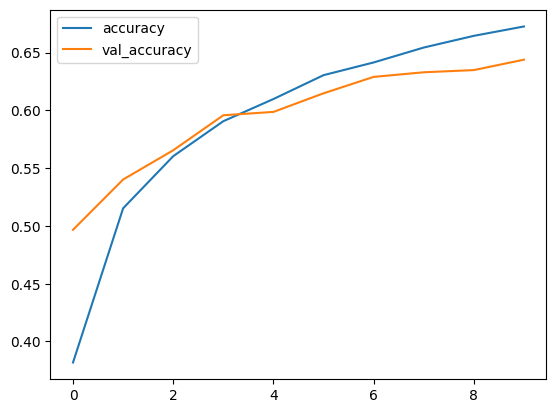

In [ ]:
losses2[["accuracy", "val_accuracy"]].plot()

<Axes: >

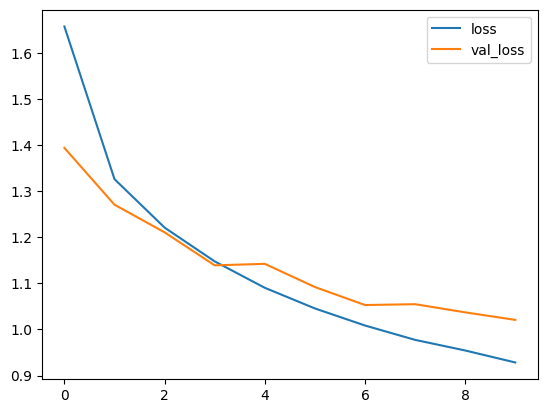

In [ ]:
losses2[["loss", "val_loss"]].plot()

In [ ]:
model_3 = Sequential()

model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = "relu"))
model_3.add(MaxPool2D(pool_size = (2, 2)))
model_3.add(Conv2D(filters = 16, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = "relu"))
model_3.add(MaxPool2D(pool_size = (2, 2)))
model_3.add(Flatten())
model_3.add(Dense(128, activation = "relu"))
model_3.add(Dense(64, activation = "relu"))
model_3.add(Dense(32, activation = "relu"))
model_3.add(Dense(10, activation = "softmax"))
model_3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", patience = 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,042 (351.73 KB)

 Trainable params: 90,042 (351.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_3.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3097 - loss: 1.8433 - val_accuracy: 0.5230 - val_loss: 1.3194
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5442 - loss: 1.2626 - val_accuracy: 0.5796 - val_loss: 1.1990
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6054 - loss: 1.1121 - val_accuracy: 0.5923 - val_loss: 1.1557
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6483 - loss: 1.0124 - val_accuracy: 0.6453 - val_loss: 1.0220
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6674 - loss: 0.9411 - val_accuracy: 0.6333 - val_loss: 1.0400
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6921 - loss: 0.8798 - val_accuracy: 0.6582 - val_loss: 0.9817
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7139 - loss: 0.8185 - val_accuracy: 0.6663 - val_loss: 0.9805
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7327 - loss: 0.7723

In [ ]:
losses3 = pd.DataFrame(model_3.history.history)

<Axes: >

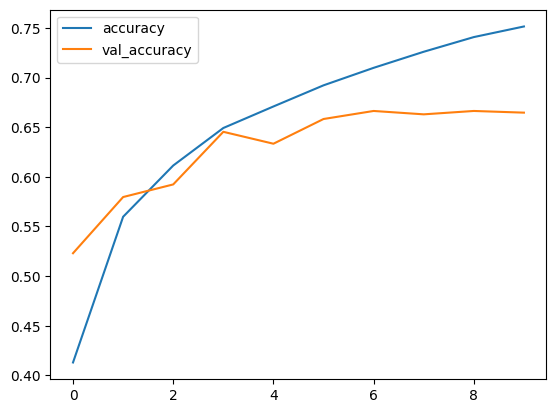

In [ ]:
losses3[["accuracy", "val_accuracy"]].plot()

<Axes: >

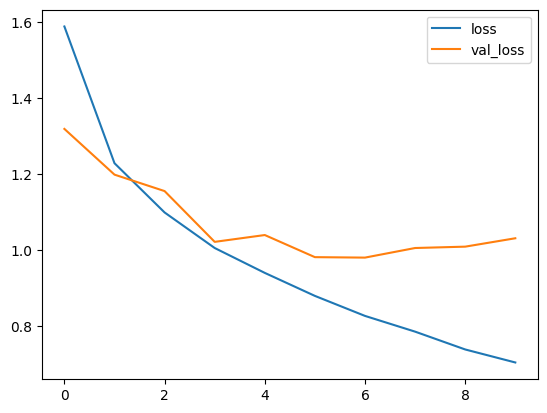

In [ ]:
losses3[["loss", "val_loss"]].plot()

In [ ]:
print(f"1. modelin doğruluğı: {losses1.max().accuracy}")
print(f"2. modelin doğruluğı: {losses2.max().accuracy}")
print(f"3. modelin doğruluğı: {losses3.max().accuracy}")

1. modelin doğruluğı: 0.7726600170135498
2. modelin doğruluğı: 0.6726400256156921
3. modelin doğruluğı: 0.7513999938964844


In [ ]:
print(f"1. modelin val doğruluğı: {losses1.max().val_accuracy}")
print(f"2. modelin val doğruluğı: {losses2.max().val_accuracy}")
print(f"3. modelin vaş doğruluğı: {losses3.max().val_accuracy}")

1. modelin val doğruluğı: 0.6463000178337097
2. modelin val doğruluğı: 0.6438999772071838
3. modelin vaş doğruluğı: 0.6662999987602234
